Logistic Regression - Trained weights: [ 1.0262064  -0.12637587]
Logistic Regression - Trained bias: -0.4176629533018031


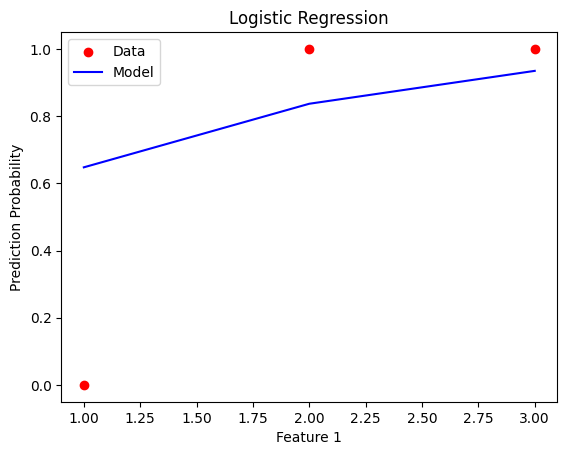

Softmax - Trained weights:
 [[ 0.48997806 -0.46540228]
 [ 0.37600821 -0.03178551]
 [-0.57996104  0.86004067]]
Softmax - Trained biases: [ 0.56873848 -0.12701024 -0.44172824]
Epoch 1, Loss: 2.3138558864593506
Epoch 2, Loss: 1.426047444343567
Epoch 3, Loss: 0.5497320294380188
Epoch 4, Loss: 0.16248969733715057
Epoch 5, Loss: 0.08086173981428146
Epoch 6, Loss: 0.05031935125589371
Epoch 7, Loss: 0.031752947717905045
Epoch 8, Loss: 0.019724762067198753
Epoch 9, Loss: 0.012158135883510113
Epoch 10, Loss: 0.007541473023593426


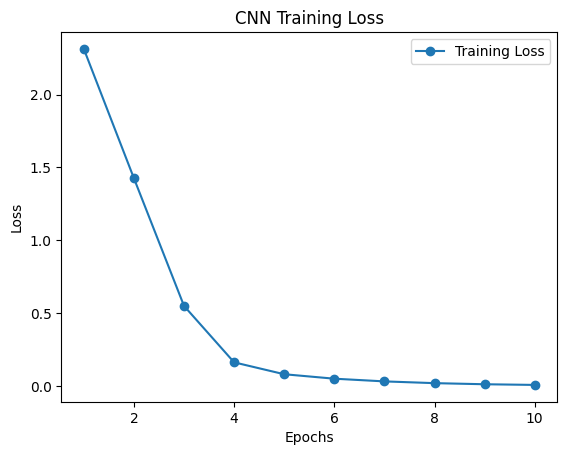

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Logistic Regression: Binary Classification
def logistic_regression():
    """
    Logistic regression for binary classification using gradient descent.
    Application: Predict whether an input belongs to one of two classes.
    """
    # Example dataset
    X = np.array([[1, 2], [2, 3], [3, 4]])  # Features
    y = np.array([0, 1, 1])  # Labels

    # Initialize parameters
    weights = np.random.randn(2)  # Random weights
    bias = 0.0
    learning_rate = 0.01
    epochs = 100

    # Gradient descent
    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias  # Linear function
            a = 1 / (1 + np.exp(-z))  # Sigmoid activation
            error = a - y[i]  # Error

            # Update weights and bias
            weights -= learning_rate * error * X[i]
            bias -= learning_rate * error

    print("Logistic Regression - Trained weights:", weights)
    print("Logistic Regression - Trained bias:", bias)

    # Visualization
    plt.scatter(X[:, 0], y, color='red', label='Data')
    plt.plot(X[:, 0], 1 / (1 + np.exp(-(X[:, 0] * weights[0] + bias))), label='Model', color='blue')
    plt.title("Logistic Regression")
    plt.xlabel("Feature 1")
    plt.ylabel("Prediction Probability")
    plt.legend()
    plt.show()

# Multiclass Classification: Softmax
def softmax_multiclass():
    """
    Multiclass classification using softmax for probabilities.
    Application: Classify inputs into one of several distinct categories.
    """
    # Example dataset
    X = np.array([[1, 2], [2, 3], [3, 4]])  # Features
    y = np.array([0, 1, 2])  # Classes: 0, 1, 2

    # Initialize parameters
    weights = np.random.randn(3, 2)  # Weights for 3 classes and 2 features
    biases = np.zeros(3)  # Biases for 3 classes
    learning_rate = 0.01
    epochs = 100

    # Gradient descent
    for epoch in range(epochs):
        for i in range(len(X)):
            logits = np.dot(weights, X[i]) + biases  # Linear function
            probs = np.exp(logits) / np.sum(np.exp(logits))  # Softmax activation

            # One-hot encoding for the target class
            y_one_hot = np.zeros(3)
            y_one_hot[y[i]] = 1

            # Gradient calculation
            error = probs - y_one_hot
            weights -= learning_rate * np.outer(error, X[i])
            biases -= learning_rate * error

    print("Softmax - Trained weights:\n", weights)
    print("Softmax - Trained biases:", biases)

# Convolutional Neural Network (CNN): Image Classification
def cnn_classification():
    """
    Convolutional Neural Network (CNN) for image classification.
    Application: Classify images into predefined categories.
    """
    # Define CNN architecture
    class SimpleCNN(nn.Module):
        def __init__(self):
            super(SimpleCNN, self).__init__()
            self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.fc1 = nn.Linear(16 * 28 * 28, 10)  # Output: 10 classes

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = x.view(x.size(0), -1)  # Flatten
            x = self.fc1(x)
            return x

    # Create model, optimizer, and loss function
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Example data (randomly generated for illustration)
    X = torch.randn(32, 1, 28, 28)  # 32 images, 1 channel, 28x28 pixels
    y = torch.randint(0, 10, (32,))  # Target labels for 10 classes

    # Training loop
    losses = []
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

    # Visualization of training loss
    plt.plot(range(1, 11), losses, marker='o', label='Training Loss')
    plt.title("CNN Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Run all models
logistic_regression()  # Binary classification
softmax_multiclass()   # Multiclass classification
cnn_classification()   # Image classification
